In [1]:
#https://www.kaggle.com/datasets/vivovinco/20212022-football-player-stats?datasetId=2152934
# Importing modules I need in order to make graphs and stuff
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
# Importing file from my desktop
df = pd.read_csv('AllPlayerStats.csv',encoding = 'cp1252')
df.head()


,Rk,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,...,Off,Crs,TklW,PKwon,PKcon,OG,Recov,AerWon,AerLost,AerWon%
0,1,Max Aarons,ENG,DF,Norwich City,Premier League,22.0,2000,34,32,...,0.03,1.41,1.16,0.0,0.06,0.03,5.53,0.47,1.59,22.7
1,2,Yunis Abdelhamid,MAR,DF,Reims,Ligue 1,34.0,1987,34,34,...,0.00,0.06,1.39,0.0,0.03,0.00,6.77,2.02,1.36,59.8
2,3,Salis Abdul Samed,GHA,MF,Clermont Foot,Ligue 1,22.0,2000,31,29,...,0.00,0.36,1.24,0.0,0.00,0.00,8.76,0.88,0.88,50.0
3,4,Laurent Abergel,FRA,MF,Lorient,Ligue 1,29.0,1993,34,34,...,0.03,0.79,2.23,0.0,0.00,0.00,8.87,0.43,0.43,50.0
4,5,Charles Abi,FRA,FW,Saint-Étienne,Ligue 1,22.0,2000,1,1,...,0.00,2.00,0.00,0.0,0.00,0.00,4.00,2.00,0.00,100.0


In [2]:
# Showing columns
print(list(df))

['Rk', 'Player', 'Nation', 'Pos', 'Squad', 'Comp', 'Age', 'Born', 'MP', 'Starts', 'Min', '90s', 'Goals', 'Shots', 'SoT', 'SoT%', 'G/Sh', 'G/SoT', 'ShoDist', 'ShoFK', 'ShoPK', 'PKatt', 'PasTotCmp', 'PasTotAtt', 'PasTotCmp%', 'PasTotDist', 'PasTotPrgDist', 'PasShoCmp', 'PasShoAtt', 'PasShoCmp%', 'PasMedCmp', 'PasMedAtt', 'PasMedCmp%', 'PasLonCmp', 'PasLonAtt', 'PasLonCmp%', 'Assists', 'PasAss', 'Pas3rd', 'PPA', 'CrsPA', 'PasProg', 'PasAtt', 'PasLive', 'PasDead', 'PasFK', 'TB', 'PasPress', 'Sw', 'PasCrs', 'CK', 'CkIn', 'CkOut', 'CkStr', 'PasGround', 'PasLow', 'PasHigh', 'PaswLeft', 'PaswRight', 'PaswHead', 'TI', 'PaswOther', 'PasCmp', 'PasOff', 'PasOut', 'PasInt', 'PasBlocks', 'SCA', 'ScaPassLive', 'ScaPassDead', 'ScaDrib', 'ScaSh', 'ScaFld', 'ScaDef', 'GCA', 'GcaPassLive', 'GcaPassDead', 'GcaDrib', 'GcaSh', 'GcaFld', 'GcaDef', 'Tkl', 'TklWon', 'TklDef3rd', 'TklMid3rd', 'TklAtt3rd', 'TklDri', 'TklDriAtt', 'TklDri%', 'TklDriPast', 'Press', 'PresSucc', 'Press%', 'PresDef3rd', 'PresMid3rd', 

In [3]:
#Choosing the Goal Column
col = 'Goals' #<-edit this value! column name as it appears in dataframe

col_name = 'Goals' #<-edit this value! descriptive name for column
freq = df[col].value_counts().rename_axis(col_name).reset_index(name='freq')
freq = freq.sort_values(by = col_name)
print(freq)

    Goals  freq
0    0.00  1539
6    0.03    54
1    0.04    94
3    0.05    67
2    0.06    72
..    ...   ...
60   1.43     3
68   2.00     2
67   2.50     3
74   3.33     2
83   5.00     1

[94 rows x 2 columns]


In [10]:
#Making my line of best fit
x_ary = df['Goals']
x_with_cnst = sm.add_constant(x_ary)
model = sm.OLS(df['Shots'], x_with_cnst)
results = model.fit()

b,m = results.params
print(m)
print(b)

2.3788648699329085
0.9557266522854173


(0.0, 6.0)

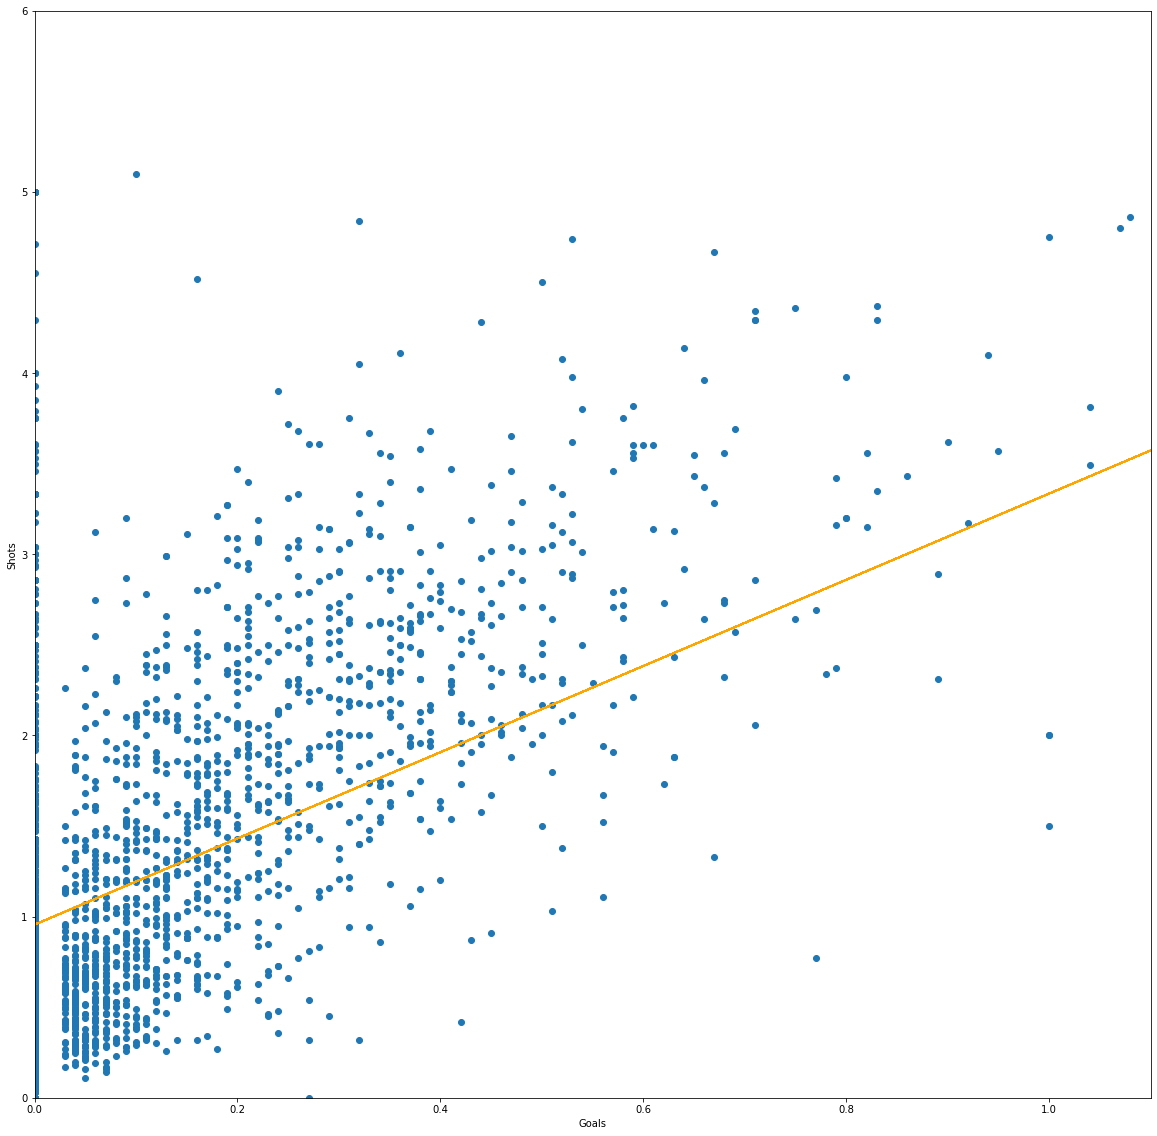

In [6]:
# Plotting the graph 
plt.figure(figsize = (20,20))
plt.ylabel('Shots')
plt.xlabel('Goals')
plt.scatter(df['Goals'], df['Shots'])
plt.plot(x_ary, m*x_ary+b, color='orange')
plt.xlim([0,1.1])
plt.ylim([0,6])




(0.0, 2.0)

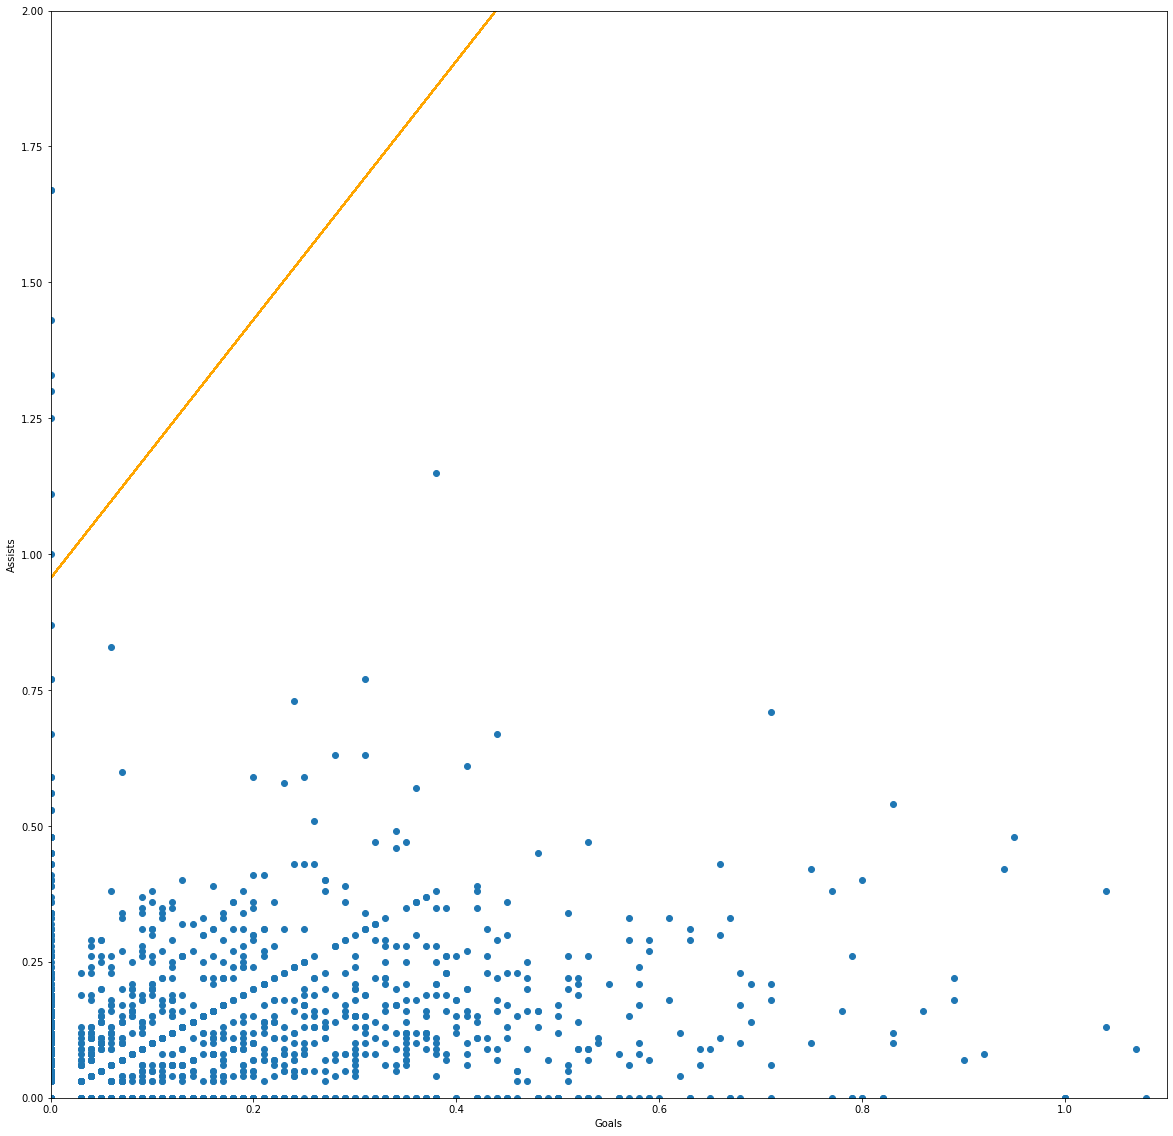

In [7]:
# Plotting another graph
plt.figure(figsize = (20,20))
plt.ylabel('Assists')
plt.xlabel('Goals')
plt.scatter(df['Goals'], df['Assists'])
plt.plot(x_ary, m*x_ary+b, color='orange')
plt.xlim([0,1.1])
plt.ylim([0,2])